In [1]:
%%time
import cv2
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import noise
import math

from atlas import Atlas


%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20

MAP_SIZE = 1024
DOTS_DENSITY = 0.009

DOTS_AMOUNT = int(MAP_SIZE * MAP_SIZE * DOTS_DENSITY)

CPU times: user 432 ms, sys: 520 ms, total: 952 ms
Wall time: 344 ms


Helper functions

In [2]:
%%time


def map_img():
    return np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)

Generate scaffolding

CPU times: user 448 ms, sys: 1.27 ms, total: 449 ms
Wall time: 450 ms


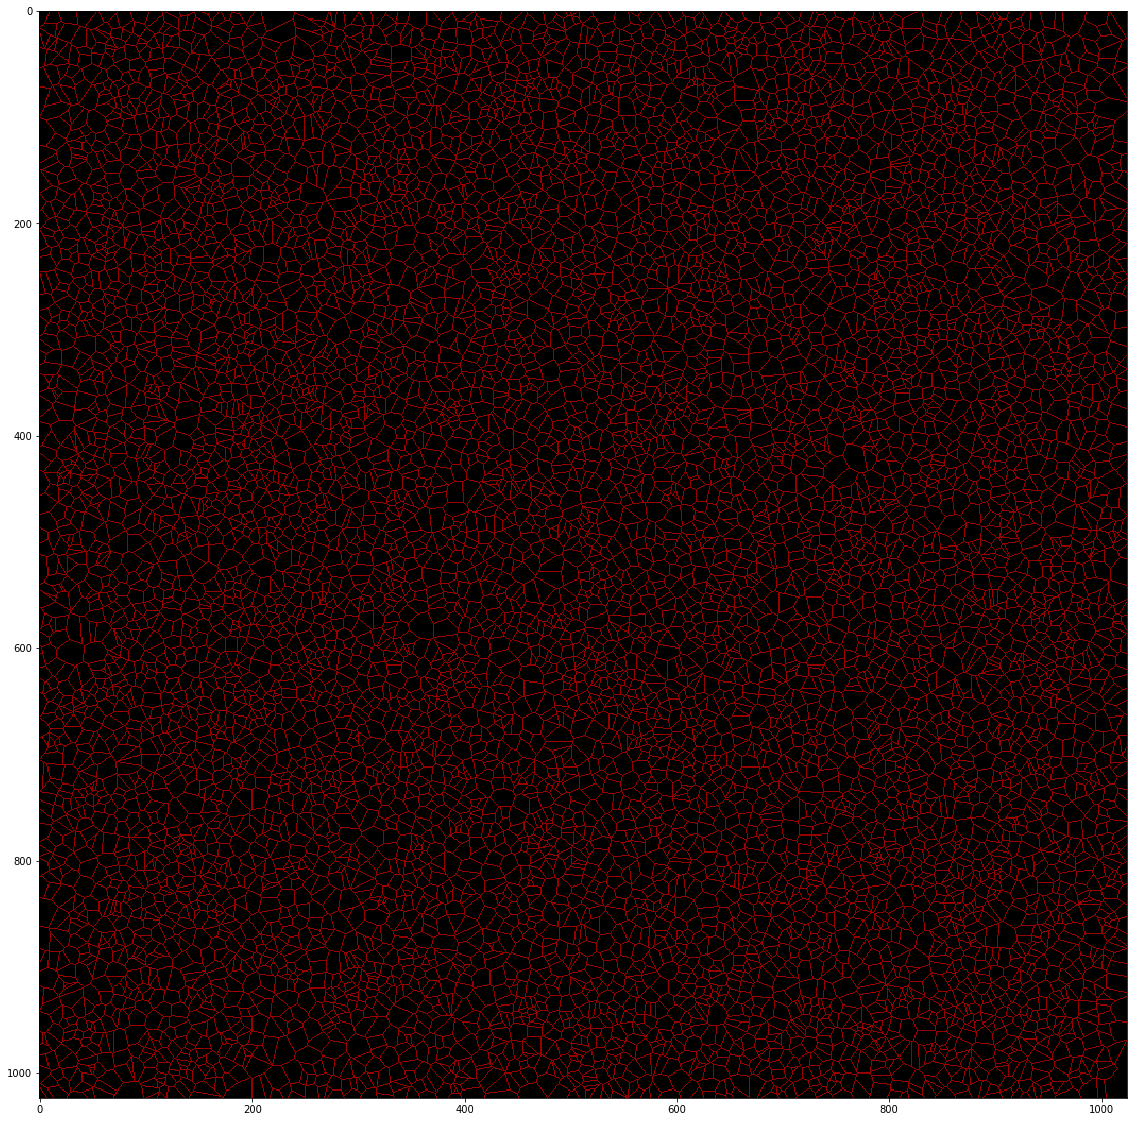

In [3]:
%%time

atlas = Atlas(dimensions=(MAP_SIZE, MAP_SIZE), granularity=DOTS_AMOUNT)
vor = atlas.generate_voronoi()


img = map_img()
# Voronoi
for i in range(len(vor.ridge_vertices)):
    if vor.ridge_vertices[i][0] < 0:
        continue
    coordinates = vor.vertices[vor.ridge_vertices[i]]
    cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (153, 0, 0), 1)

# Delaunay
# for i in range(len(vor.ridge_points)):
#     if vor.ridge_points[i][0] < 0:
#         continue
#     coordinates = vor.points[vor.ridge_points[i]]
#     cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (0, 0, 102), 1)

plt.imshow(img)

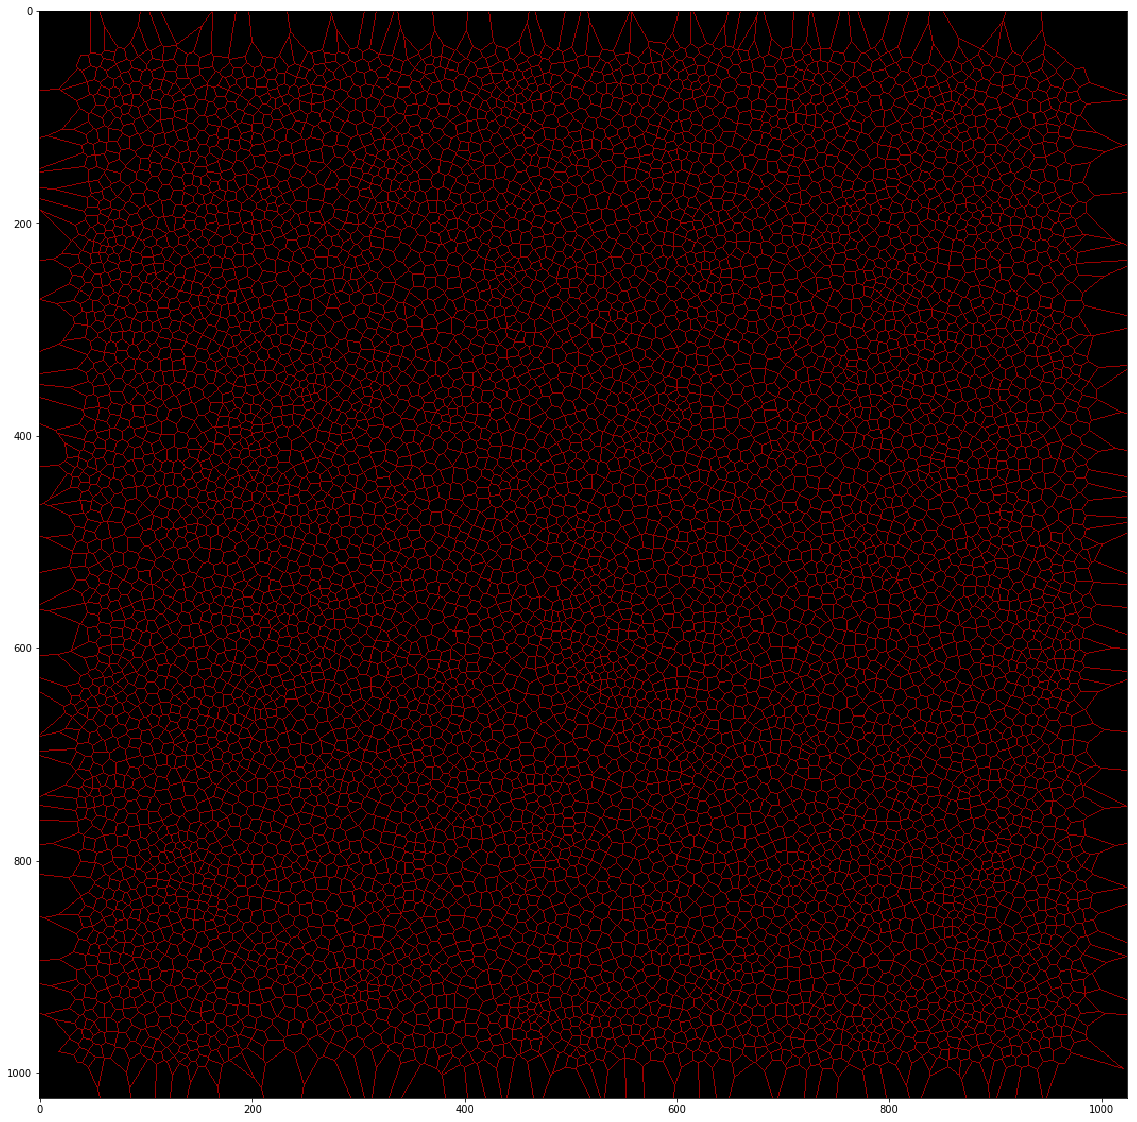

In [5]:
vor = atlas.relax_points(times=2)

img = map_img()

# Voronoi
for i in range(len(vor.ridge_vertices)):
    if vor.ridge_vertices[i][0] < 0:
        continue
    coordinates = vor.vertices[vor.ridge_vertices[i]]
    cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (153, 0, 0), 1)

# Delaunay
# for i in range(len(vor.ridge_points)):
#     if vor.ridge_points[i][0] < 0:
#         continue
#     coordinates = vor.points[vor.ridge_points[i]]
#     cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (0, 0, 102), 1)

plt.imshow(img)

CPU times: user 2.16 s, sys: 0 ns, total: 2.16 s
Wall time: 2.17 s


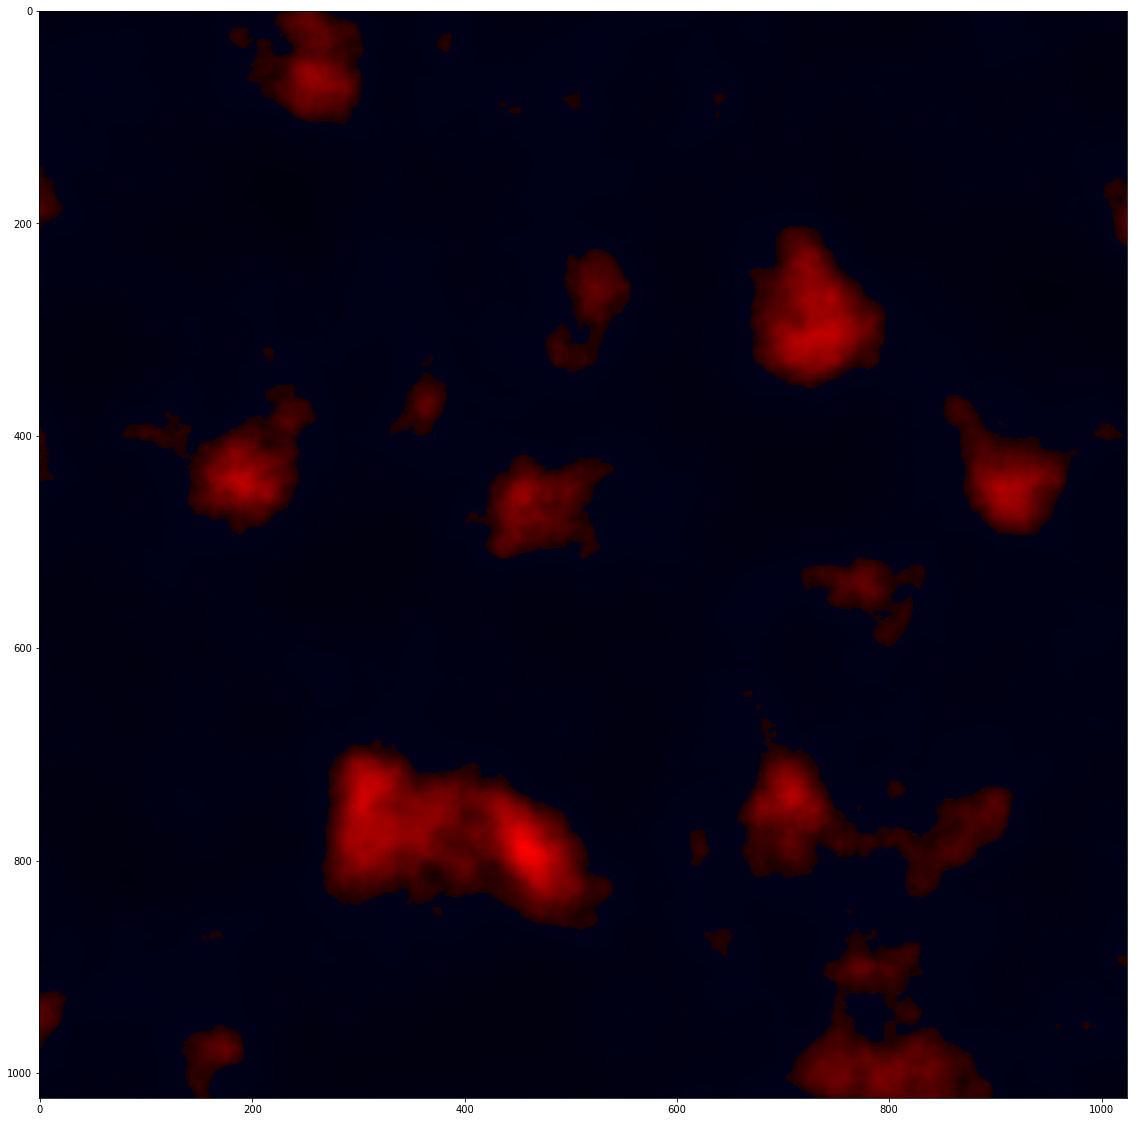

In [7]:
%%time

scale = 256.0
octaves = 6
persistence = 0.5
lacunarity = 1.9

colormap = LinearSegmentedColormap(
    'TerrainCmap', {
        'red': (
            (0.0, 0.0, 0.0),
            (0.5, 0.0, 0.1),
            (1.0, 1.0, 1.0),
        ),

        'green': (
            (0.0, 0.0, 0.0),
            (1.0, 0.0, 0.0),
        ),

        'blue': (
            (0.0, 0.0, 0.05),
            (0.5, 0.1, 0.0),
            (1.0, 0.0, 0.0),
        ),
    })


img = np.zeros((MAP_SIZE, MAP_SIZE), np.float32)
for i in range(MAP_SIZE):
    for j in range(MAP_SIZE):
        val = noise.snoise2(i / scale,
                            j / scale,
                            octaves=octaves,
                            persistence=persistence,
                            lacunarity=lacunarity,
                            repeatx=1024,
                            repeaty=1024,
                            base=0)
        img[i][j] = ((val + 1) / 2.0)**2
plt.imshow(img, cmap=colormap)
# plt.imshow(img, cmap=plt.cm.get_cmap('terrain'))
